In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('/content/heart_disease_uci.csv')


# **Data Cleaning**

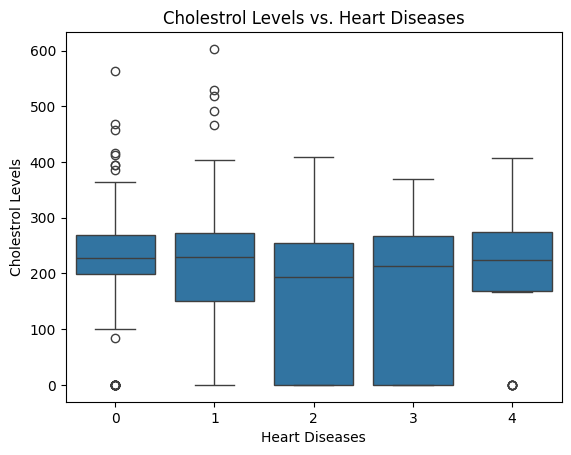

In [ ]:
sns.boxplot(df, x='num', y= 'chol')
plt.title('Cholestrol Levels vs. Heart Diseases')
plt.xlabel("Heart Diseases")
plt.ylabel('Cholestrol Levels')
plt.show()

# Handle Inappropriate Zeros

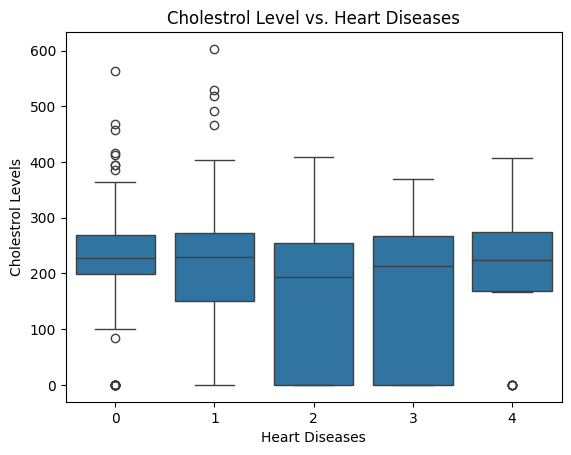

In [ ]:
sns.boxplot(df, x='num', y= 'chol')
plt.title('Cholestrol Level vs. Heart Diseases')
plt.xlabel('Heart Diseases')
plt.ylabel('Cholestrol Levels')
#plt.xticks([0,1,2,3,4], ['Nai', 'olpo ase', 'ase', 'beshi', 'voyaboho'])
plt.show()

# Fill in missing values

In [ ]:
# for numeric columns: we use median valuues to fill (impute) missing value

numeric_columns = ['trestbps', 'chol', 'thalch', 'oldpeak']
numeric_imputer = SimpleImputer(strategy='median')
df[numeric_columns] = numeric_imputer.fit_transform(df[numeric_columns])

# for categoric values we use the most frequent values to fill missing data
categorical_columns = ['fbs', 'restecg', 'exang', 'slope', 'thal']
categorical_imputer = SimpleImputer(strategy='most_frequent')

df[categorical_columns] = categorical_imputer.fit_transform(df[categorical_columns])

In [ ]:
df.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalch        0
exang         0
oldpeak       0
slope         0
ca          611
thal          0
num           0
dtype: int64

In [ ]:
df.drop(['ca'], axis=1, inplace=True)


In [ ]:
df.isnull().sum()


id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

# Data Transform

Label Encoding The Categorical Values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    float64
 2   sex       920 non-null    int64  
 3   dataset   920 non-null    int64  
 4   cp        920 non-null    int64  
 5   trestbps  920 non-null    float64
 6   chol      920 non-null    float64
 7   fbs       920 non-null    int64  
 8   restecg   920 non-null    int64  
 9   thalch    920 non-null    float64
 10  exang     920 non-null    int64  
 11  oldpeak   920 non-null    float64
 12  slope     920 non-null    int64  
 13  thal      920 non-null    int64  
 14  num       920 non-null    int64  
dtypes: float64(5), int64(10)
memory usage: 107.9 KB


In [ ]:
columns_to_encode = ['thal', 'dataset', 'slope', 'sex', 'num', 'cp', 'restecg', 'fbs', 'exang']

label_encoders = {}

for col in columns_to_encode:
  # Create a new LabelEncoder
  le = LabelEncoder()

  # fit and transform the data
  df[col] = le.fit_transform(df[col])

  # store the encoder for Later
  label_encoders[col] = le

In [ ]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,1,0.714286,1,0,3,0.725,0.386401,1,0,0.633803,0,0.556818,0,0,0
1,2,0.795918,1,0,0,0.800,0.474295,0,0,0.338028,1,0.465909,1,1,2
2,3,0.795918,1,0,0,0.600,0.379768,0,0,0.485915,1,0.590909,1,2,1
3,4,0.183673,1,0,2,0.650,0.414594,0,1,0.894366,0,0.693182,0,1,0
4,5,0.265306,0,0,1,0.650,0.338308,0,0,0.788732,0,0.454545,2,1,0




**Transform the numeric columns**

In [ ]:
columns_to_scale = ['oldpeak', 'thalch', 'chol', 'trestbps', 'age']
min_max_scalers = {}

for col in columns_to_scale:
  scaler = MinMaxScaler()

  df[col] = scaler.fit_transform(df[[col]])

  min_max_scalers[col] = scaler

In [ ]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,1,0.714286,1,0,3,0.725,0.386401,1,0,0.633803,0,0.556818,0,0,0
1,2,0.795918,1,0,0,0.800,0.474295,0,0,0.338028,1,0.465909,1,1,2
2,3,0.795918,1,0,0,0.600,0.379768,0,0,0.485915,1,0.590909,1,2,1
3,4,0.183673,1,0,2,0.650,0.414594,0,1,0.894366,0,0.693182,0,1,0
4,5,0.265306,0,0,1,0.650,0.338308,0,0,0.788732,0,0.454545,2,1,0


In [ ]:
df.describe()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
count,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000
mean,460.500000,0.520630,0.789130,1.238043,0.782609,0.659978,0.331524,0.150000,0.990217,0.547130,0.366304,0.392416,1.152174,1.158696,0.995652
std,265.725422,0.192341,0.408148,1.130673,0.956350,0.092256,0.180829,0.357266,0.631863,0.177079,0.482056,0.120233,0.516007,0.483493,1.142693
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,230.750000,0.387755,1.000000,0.000000,0.000000,0.600000,0.294776,0.000000,1.000000,0.422535,0.000000,0.295455,1.000000,1.000000,0.000000
50%,460.500000,0.530612,1.000000,1.000000,0.000000,0.650000,0.369818,0.000000,1.000000,0.563380,0.000000,0.352273,1.000000,1.000000,1.000000
75%,690.250000,0.653061,1.000000,2.000000,2.000000,0.700000,0.442786,0.000000,1.000000,0.676056,1.000000,0.465909,1.000000,1.000000,2.000000
max,920.000000,1.000000,1.000000,3.000000,3.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,4.000000


**Select only Necessary Values**

In [ ]:
X = df.drop(['id', 'num'], axis = 1)

In [ ]:
X

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
0,0.714286,1,0,3,0.725,0.386401,1,0,0.633803,0,0.556818,0,0
1,0.795918,1,0,0,0.800,0.474295,0,0,0.338028,1,0.465909,1,1
2,0.795918,1,0,0,0.600,0.379768,0,0,0.485915,1,0.590909,1,2
3,0.183673,1,0,2,0.650,0.414594,0,1,0.894366,0,0.693182,0,1
4,0.265306,0,0,1,0.650,0.338308,0,0,0.788732,0,0.454545,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,0.530612,0,3,0,0.635,0.552239,1,2,0.661972,0,0.295455,1,1
916,0.693878,1,3,3,0.650,0.230514,0,2,0.563380,0,0.352273,1,1
917,0.551020,1,3,0,0.610,0.369818,1,2,0.281690,0,0.295455,1,0
918,0.612245,1,3,0,0.650,0.638474,1,0,0.563380,0,0.352273,1,1


In [ ]:
y = df['num']

In [ ]:
y

0      0
1      2
2      1
3      0
4      0
      ..
915    1
916    0
917    2
918    0
919    1
Name: num, Length: 920, dtype: int64

**Splitting Data**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)


# Train an ML classifier

**Train some models**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
model = RandomForestClassifier(n_estimators=1000, max_depth=30)

In [ ]:
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=30, n_estimators=1000)

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org. **bold text**

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of our Random Forest model: ', accuracy)

Accuracy of our Random Forest model:  0.6086956521739131


In [ ]:

# declare model
model = KNeighborsClassifier()

# train to data
model.fit(X_train, y_train)

# predict on test data
y_pred = model.predict(X_test)

# evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of our KNN model: ', accuracy)

Accuracy of our KNN model:  0.5815217391304348


In [ ]:

# declare model
model = XGBClassifier()

# train to data
model.fit(X_train, y_train)

# predict on test data
y_pred = model.predict(X_test)

# evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of our XGB model: ', accuracy)

Accuracy of our XGB model:  0.5597826086956522


**Evaluate their performances**

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.83      0.78        87
           1       0.45      0.52      0.48        48
           2       0.27      0.12      0.17        25
           3       0.17      0.16      0.16        19
           4       0.00      0.00      0.00         5

    accuracy                           0.56       184
   macro avg       0.33      0.33      0.32       184
weighted avg       0.52      0.56      0.53       184



In [ ]:
cm = confusion_matrix(y_test, y_pred)

<Axes: >

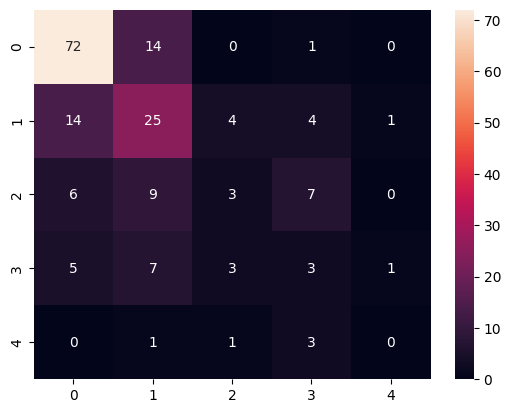

In [ ]:
sns.heatmap(cm, annot=True)

Binary Classification

In [ ]:
y_binary = df['num']
y_binary

0      0
1      2
2      1
3      0
4      0
      ..
915    1
916    0
917    2
918    0
919    1
Name: num, Length: 920, dtype: int64

In [ ]:
y_binary = y_binary.replace(2, 1)
y_binary = y_binary.replace(3, 1)
y_binary = y_binary.replace(4, 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, train_size=0.8)


In [ ]:

# declare model
model = RandomForestClassifier(n_estimators=1000, max_depth=30)

# train to data
model.fit(X_train, y_train)

# predict on test data
y_pred = model.predict(X_test)

# evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of our Random Forest model: ', accuracy)

Accuracy of our Random Forest model:  0.8315217391304348


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.77      0.82        90
           1       0.80      0.89      0.84        94

    accuracy                           0.83       184
   macro avg       0.84      0.83      0.83       184
weighted avg       0.84      0.83      0.83       184



<Axes: >

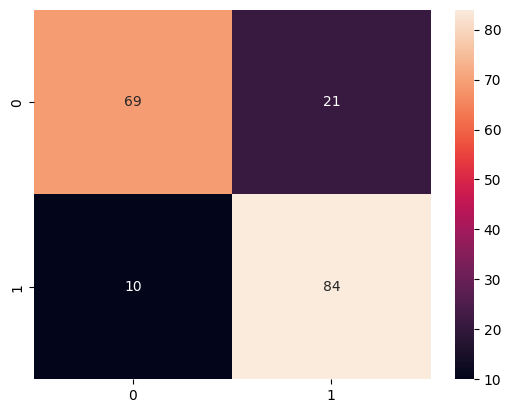

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [1]:
# # model predict korse heart disease ase, ashole ase
# True Positive

# # model predict korse heart disease nai, ashole nai
# True Negative

# # model predict korse heart disease ase, ashole nai
# False Positive

# # model predict korse heart disease nai, ashole ase
# False Negative